In [20]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


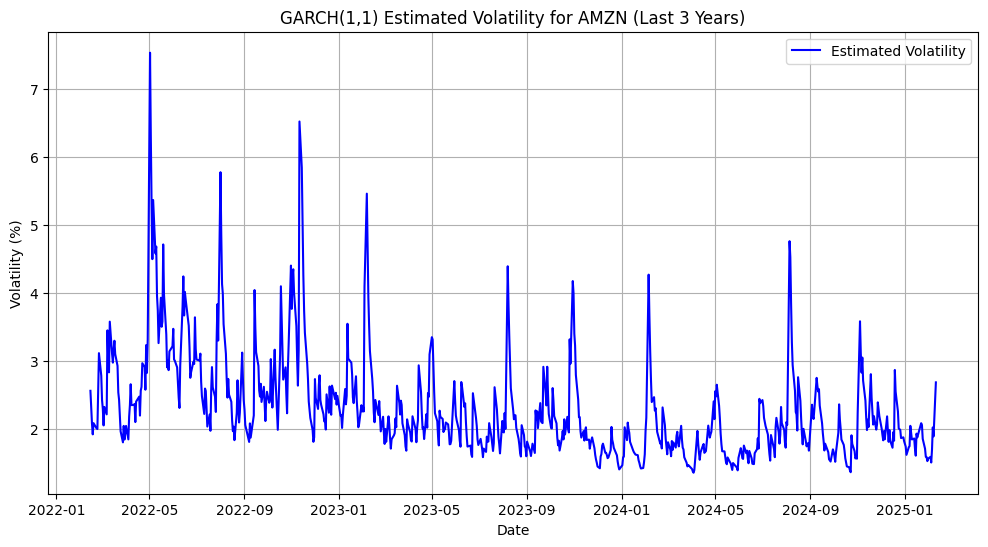

Volatility Change Over 3 Years: nan%


In [21]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Select a stock (e.g., AAPL for Apple Inc.)
stock_symbol = "AMZN"

# Fetch historical stock data for the past 3 years
data = yf.download(stock_symbol, period="3y")

# Calculate daily returns
data["Return"] = data["Close"].pct_change().dropna()

# Fit GARCH(1,1) model
returns = data["Return"].dropna() * 100  # Convert to percentage
garch_model = arch_model(returns, vol="Garch", p=1, q=1)
garch_result = garch_model.fit(disp="off")

# Get estimated volatility
data["Volatility"] = garch_result.conditional_volatility

# Plot the volatility over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Volatility"], label="Estimated Volatility", color="blue")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.title(f"GARCH(1,1) Estimated Volatility for {stock_symbol} (Last 3 Years)")
plt.legend()
plt.grid()
plt.show()

# Get the difference in volatility over 3 years
volatility_change = data["Volatility"].iloc[-1] - data["Volatility"].iloc[0]
print(f"Volatility Change Over 3 Years: {volatility_change:.4f}%")